In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from CleaningCars import ultimateClean


# Load the data

In [2]:
df = pd.read_csv('data/vehicles.csv')


In [6]:

df = ultimateClean(df)


Remove outliers...
Remove outliers...
Cleaned outliers !
Imputed Missing Values


/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


One hot encodings done!
Total Time:  8.633119265238443  minutes


In [7]:
# df.to_csv('./data/reduced.csv')


# Load from reduced data

In [ ]:
df = pd.read_csv('./data/reduced.csv')


In [9]:
df.head()


,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,2010.0,1,32742.0,32.590000,-85.480000,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,7500,2014.0,1,93600.0,32.547500,-85.468200,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4900,2006.0,1,87046.0,32.616807,-85.464149,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2000,1974.0,1,190000.0,32.861600,-85.216100,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,19500,2005.0,1,116000.0,32.547500,-85.468200,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388335 entries, 0 to 389097
Columns: 103 entries, price to tfidf_9
dtypes: float64(4), int64(2), uint8(97)
memory usage: 56.7 MB


# Feature Scaling

In [12]:

numerical_cols = ['year','odometer','lat','long']

df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])



In [13]:
df.head()



,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,-0.173466,1,-1.012954,-1.050979,0.485853,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,7500,0.352056,1,0.016411,-1.058345,0.486507,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4900,-0.698987,1,-0.094445,-1.046333,0.486732,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2000,-4.903157,1,1.646941,-1.003905,0.500482,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,19500,-0.830367,1,0.395289,-1.058345,0.486507,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# Spliting

In [14]:
X = df.drop('price', axis=1)

y = df['price']


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# SVM

In [20]:

from sklearn.svm import SVR

# Fit regression model
svr_rbf = SVR(kernel='rbf')

svr_lin = SVR(kernel='linear')

svr_poly = SVR(kernel='poly')



In [21]:
svr_rbf.fit(X_train, y_train)


SVR()

In [22]:
from sklearn.metrics import mean_squared_error

y_train_pred =  svr_rbf.predict(X_train)
train_mse=mean_squared_error(y_train, y_train_pred)

y_test_pred = svr_rbf.predict(X_test)
test_mse=mean_squared_error(y_test, y_test_pred)


In [23]:
train_mse, test_mse


(89343594.47854511, 88924316.08518271)

In [3]:
import numpy as np
np.sqrt(88924316)

9429.969034943859

Text(0, 0.5, 'Prediction')

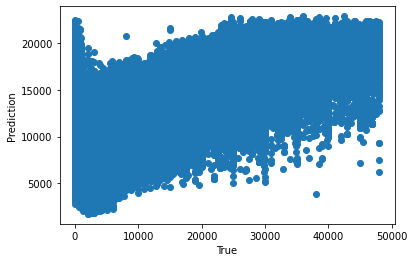

In [25]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.set_xlabel('True')
ax.set_ylabel('Prediction')
